# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 26 Machine Learning (III)

We have briefly discusseed classicification and dimension reduction used in Machine Learning. Now let's talk about another important application, regression. Regression, similar to classification, is dedicated to estimate the relationships among variables, namely to find the proper function which allows f(x)=y. The difference is that here y is a continous number. Recall that we once learned how to fit some data points to a desired linear, polynomoial or exponential function. This works well for that case where the dataset has a few dimensions and the relation could be clearly reprensented by some simple equations. If we are dealing with more sophiscated dataset, such assumptions are very likely to fail. Therefore, we need to teach the machine think like human's brain, which leads to the birth of artifical neural networks.


## 26.1 Artificial Neural Networks


A neural network algorithm contains the following items: 

**Architecture**. The architecture specifies what variables are involved in the network and their topological relationships – for example, the variables involved in a neural net might be the weights of the connections between the neurons, along with the activities of the neurons.

**Activity rule**. Most neural network models have short time-scale dynamics: local rules define how the activities of the neurons change in response to each other. Typically the activity rule depends on the weights (the parameters) in the network.

**Learning rule**. The learning rule specifies the way in which the neural network’s weights change with time. This learning is usually viewed as taking place on a longer time scale than the time scale of the dynamics under the activity rule. Usually the learning rule will depend on the activities of the neurons. It may also depend on the values of target values supplied by a teacher and on the current value of the weights.


## 26.2 A single neuron

While the behavior of a large network of neurons is complex and intricate, we can easily understand the basic guiding principles by looking at a single neuron. Same as most complex systems, the behavior of the whole cannot be easily understood by knowing how a single component of the network operates. However, this will give us very valuable information and guide our intuition.

We will study a single neuron for two reasons. First, many neural network models are built out of single neurons, so it is good to understand them in detail. And second, a single neuron is itself capable of ‘learning’ – indeed, various standard statistical methods can be viewed in terms of single neurons – so this model will serve as a first example of a supervised neural network.

### Definition of a single neuron

**Architecture**. A single neuron has a number $I$ of inputs $x_i$ and one output which we will here call $y$. (See figure below) Associated with each input is a weight $w_i (i = 1,\cdots, I)$. There may be an additional parameter $w_0$ of the neuron called a bias which we may view as being the weight associated with an input $x_0$ which is permanently set to $1$. The single neuron is a feedforward device – the connections are directed from the inputs to the output of the neuron.

**Activity rule**. The activity rule has two steps.

1. First, in response to the imposed inputs x, we compute the activation of the neuron, $$ a =   \sum_i w_ix_i, $$ where the sum is over $i = 0,\cdots,I$ if there is a bias and $i = 1,\cdots,I$ otherwise.

2. Second, the output $y$ is set as a function $f(a)$ of the activation. The output is also called the activity of the neuron, not to be confused with the activation $a$. There are several possible activation functions; here are the most popular (We only list deterministic activation functions):
    
    - Linear: $$y(a) = a.$$
    
    - Sigmoid (logistic function): $$ y(a) = \frac{1}{1+e^{-a}} $$
    
    - Sigmoid: $$ y(a) = \tanh(a) = \frac{e^a - e^{-a}}{e^a + e^{-a}}$$
        
<img src="img/neuron.png" style="width: 250px;"/>
<center> Figure 1, Single neuron with weights $w$ and bias $w_0$</center>


### Basic neural network concepts

A neural network implements a function $y(\bf{x; w})$; the ‘output’ of the network, $y$, is a nonlinear function of the ‘inputs’ $x$; this function is parameterized by ‘weights’ $\bf{w}$.
We will study a single neuron which produces an output between 0 and 1 as the following function of $\bf{x}$:

$$ \frac{1}{1+e^{-\bf{w}\cdot\bf{x}}} $$


### Training the single neuron as a binary classifier

We assume we have a data set of inputs $\{{\bf x}^{(n)}\}^N_{n=1}$ with binary labels $\{t^{(n)}\}^N_{n=1}$, and a neuron whose output $y(\bf{x; w})$ is bounded between 0 and 1. We can then write down the following error function:

<!-- 
$$E({\bf w}) = -\sum_{n=1}^N t^{(n)} \ln{y({\bf x}^{(n)}; {\bf w})} + (1 − t^{(n)}) \ln{(1 − y({\bf x}^{(n)}; {\bf w})}) $$
-->

$$ E({\bf w}) = \sum_{n=1}^N (y({\bf x}^{(n)};{\bf w}) - t^{(n)})^2$$

Each term in this objective function may be recognized as the error of one outcome and, as expected, is positive definite. The objective function is bounded below by zero and only attains this value if $y({\bf x}^{(n)}; {\bf w}) = t^{(n)}$ for all $n$.
We now differentiate this objective function with respect to $\bf{w}$:

<!-- $$ e_j^{(n)} = \frac{\partial E}{\partial w_j} = −\sum_{n=1}^N (t^{(n)} − y^{(n)})x^{(n)}$$
-->

$$ g_j^{(n)} = \frac{\partial E}{\partial w_j} = 2\sum_{n=1}^N (t^{(n)} − y^{(n)})x_j^{(n)} $$

Notice that the quantity $e^{(n)} ≡ t^{(n)} − y^{(n)}$ is the error on example $n$ - the difference between the target and the output.

**Learning rule (gradient descent)**. The teacher supplies a real target value $t$ between $(0,1)$ which says what the correct answer is for the given input. We compute the error signal:
$$e=t−y$$
then adjust the weights w in a direction that would reduce the magnitude
of this error:
$$\Delta w_i = \eta ex_i,$$ 
where $\eta$ is the ‘learning rate’. This corresponds to sliding downhill on the surface defined by $E$ in $w$-space. We can approximate the bottom of the $E$-curve with arbitrary accuracy, unless we get trapped in a local minimum (more about gradient descent later). Commonly $\eta$ is set by trial and error to a constant value or to a decreasing function of simulation time. 

Let's suppose we want to fit a straight line $y=w_{1}+w_{2}x$ to a training set of two-dimensional points $ (x_{1},y_{1}),\ldots ,(x_{n},y_{n})$ using least squares. The objective function to be minimized is:

$$
\begin{aligned}
Q(w)=\sum _{i=1}^{n}Q_{i}(w)=\sum _{i=1}^{n}\left(w_{1}+w_{2}x_{i}-y_{i}\right)^{2}.
\end{aligned}
$$

The last line in the above pseudocode for this specific problem will become:

$$
\begin{bmatrix}w_{1}\\w_{2}\end{bmatrix}:={\begin{bmatrix}w_{1}\\w_{2}\end{bmatrix}}-\eta {\begin{bmatrix}2(w_{1}+w_{2}x_{i}-y_{i})\\2x_{i}(w_{1}+w_{2}x_{i}-y_{i})\end{bmatrix}}.
$$


The following code trains a single network with the activation function:
$$ \frac{1}{1+e^{-(w_1 x_1 + w_2 x_2 + w_0)}} $$


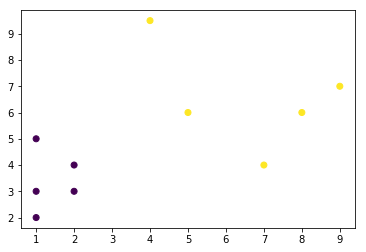

In [2]:
import matplotlib.pyplot as plt
import numpy as np


x = np.array([[1,1,2],[1,1,3],[1,1,5],[1,2,3],[1,2,4],[1,7,4],[1,5,6],[1,8,6],[1,9,7],[1,4,9.5]])
t = np.array([0,0,0,0,0,1,1,1,1,1])
plt.scatter(x[:,1],x[:,2], c=t)
plt.show()


In [3]:
def sigmoid(v):
    return 1./(1+np.exp(-v))


def singleNeuron(x, t, max_iter = 8000):
    
    w0 = np.array([1,1,1])
    w_hist = np.zeros([max_iter,3])
    learning_rate = 0.01
    decay_rate = 0.0

    for i in range(max_iter):
        a = np.dot(x,w0)
        y = sigmoid(a)
        g = -np.dot(np.transpose(x),t-y)
        w0 = w0 - learning_rate*(g + decay_rate*w0)
        w_hist[i,:] = w0
    return w_hist

def results(x, w0):
    for x0 in x:
        print(sigmoid(w0[0] + w0[1]*x0[1]+w0[2]*x0[2]))

In [4]:
w_hist = singleNeuron(x, t)

In [5]:
results(x, w_hist[0])

0.971860800012
0.987540896252
0.99761031473
0.995048449601
0.997836383208
0.999979301526
0.999974738805
0.999998449899
0.99999973359
0.999996502303


In [6]:
results(x, w_hist[-1])

0.00105729613699
0.00174218596535
0.00472266736881
0.0187549150045
0.0305532416454
0.999798650689
0.991194045052
0.99999323672
0.999999625477
0.983379665113


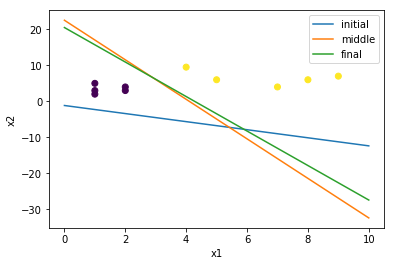

In [18]:
import matplotlib.pyplot as plt

def plane(x,w):
    return (-w[0] - x*w[1])/w[2]
plt.scatter(x[:,1],x[:,2], c=t)

x0 = np.linspace(0,10,20)
y0 = plane(x0, w_hist[0])
plt.plot(x0, y0, label='initial')

y0 = plane(x0, w_hist[int(len(w_hist)/2)])
plt.plot(x0, y0, label='middle')

y0 = plane(x0, w_hist[-1])
plt.plot(x0, y0, label='final')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


In [50]:
#We can also change the X and check how it works
x = np.array([[0,1,2],[1,1,3],[-1,1,5],[1,2,3],[3,2,4],[1,7,4],[4,5,6],[1,8,6],[1,9,7],[1,4,9.5]])
t = np.array([0,0,0,0,0,1,1,1,1,1])

def sigmoid(v):
    return 1./(1+np.exp(-v))

def singleNeuron(x, t, max_iter = 8000):
    
    w0 = np.array([1,1,1])
    w_hist = np.zeros([max_iter,3])
    learning_rate = 0.01
    decay_rate = 0.0

    for i in range(max_iter):
        a = np.dot(x,w0)
        y = sigmoid(a)
        g = -np.dot(np.transpose(x),t-y)
        w0 = w0 - learning_rate*(g + decay_rate*w0)
        w_hist[i,:] = w0
    return w_hist

def results(x, w0):
    for x0 in x:
        print(sigmoid(w0[0] + w0[1]*x0[1]+w0[2]*x0[2]))

In [49]:
w_hist = singleNeuron(x, t, max_iter=180000)
results(x, w_hist[-1])

0.384941133429
0.214257415712
0.049214598331
0.70655548126
0.511970120099
0.999982242959
0.9927590476
0.999989406166
0.999997246317
0.458766046466


## 26.3 Why Neuron Network works or fails?

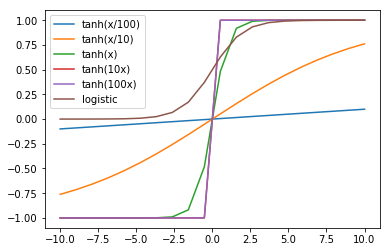

In [4]:
#hyperbolic tangent could provide very flexible curves
x0 = np.linspace(-10,10,20)
y0 = np.tanh(x0)
plt.plot(x0, np.tanh(0.01*x0), label='tanh(x/100)')
plt.plot(x0, np.tanh(0.1*x0), label='tanh(x/10)')
plt.plot(x0, np.tanh(x0), label='tanh(x)')
plt.plot(x0, np.tanh(10*x0), label='tanh(10x)')
plt.plot(x0, np.tanh(100*x0), label='tanh(100x)')
plt.plot(x0, 1/(1+np.exp(-x0)), label='logistic')

plt.legend()

plt.show()

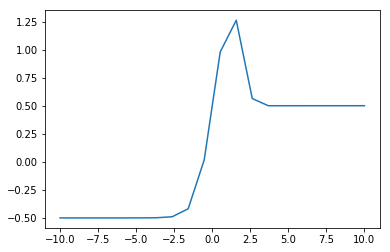

In [45]:
#hyperbolic tangent could provide very flexible curves
x0 = np.linspace(-10,10,20)
plt.plot(x0, np.tanh(x0) - 0.5*np.tanh(2*(x0-2)))
plt.show()

## 26.4 Multi-layer perceptrons

The multilayer perceptron is a feedforward network. It has input neurons, hidden neurons and output neurons. 
The hidden neurons may be arranged in a sequence of layers. The most common multilayer perceptrons have a single hidden layer, and are known as ‘two-layer’ networks, the number ‘two’ counting the number of layers of neurons not including the inputs.
Such a feedforward network defines a nonlinear parameterized mapping from an input ${\bf x}$ to an output ${\bf y} = {\bf y}({\bf x};{\bf w},{\cal A})$. The output is a continuous function of the input and of the parameters ${\bf w}$. The architecture of the network is referred-to as ${\cal A}$. Feedforward networks can be ‘trained’ to perform regression and classification tasks.

Somewhat confusingly, and for historical reasons, such multiple layer networks are sometimes called multilayer perceptrons or MLPs.

### The network architecture

The design of the input and output layers in a network is often straightforward. For example, suppose we are trying to determine whether a handwritten image depicts a "9" or not. A natural way to design the network is to encode the intensities of the image pixels into the input neurons. If the image is a $64 \times 64$ greyscale image, then we'd have $4,096=64 \times 64$
 input neurons, with the intensities scaled appropriately between 0 and 1.
The output layer will contain just a single neuron, with output values of less than 0.5
 indicating "input image is not a 9", and values greater than 0.5
 indicating "input image is a 9 ".

While the design of the input and output layers of a neural network is often straightforward, there can be quite an art to the design of the hidden layers. In particular, it's not possible to sum up the design process for the hidden layers with a few simple rules of thumb. Instead, neural networks researchers have developed many design heuristics for the hidden layers, which help people get the behaviour they want out of their nets. For example, such heuristics can be used to help determine how to trade off the number of hidden layers against the time required to train the network. 

We have been discussing neural networks where the output from one layer is used as input to the next layer. Such networks are called feedforward neural networks. This means there are no loops in the network - information is always fed forward, never fed back. 


### Regression networks
In the case of a regression problem, the mapping for a network with one hidden layer may have the form:

Hidden layer:
$$
a^{(1)}_j = \sum_l w^{(1)}_{jl}x_l +\theta_j^{(1)}; \quad h_j =f^{(1)}(a_j^{(1)})
$$

Output layer:

$$
a^{(2)}_i = \sum_j w^{(2)}_{ij}x_j +\theta_i^{(2)}; \quad y_i =f^{(2)}(a_i^{(2)})
$$

where, for example, $f^{(1)}(a) = \tanh(a)$, and $f^{(2)}(a) = a$. Here $l$ runs over
the inputs $x_1, \cdots , x_L$, $j$ runs over the hidden units, and $i$ runs over the outputs. The ‘weights’ $w$ and ‘biases’ $\theta$ together make up the parameter vector ${\bf w}$.
The nonlinear sigmoid function $f$ at the hidden layer gives the neural network greater computational flexibility than a standard linear regression model. Graphically, we can represent the neural network as a set of layers of connected neurons:

<img src="img/nn.png" style="width: 500px;"/>
<center>Figure 2, Basic network with two hidden layers</center>

### 26.5 [Neural Network in scikit](http://scikit-learn.org/stable/modules/neural_networks_supervised.html)
Below is an example of classification with varying the parameters.


A comparison of different values for regularization parameter ‘alpha’ on synthetic datasets. The plot shows that different alphas yield different decision functions.
Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.

Automatically created module for IPython interactive environment


/Users/qiangzhu/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


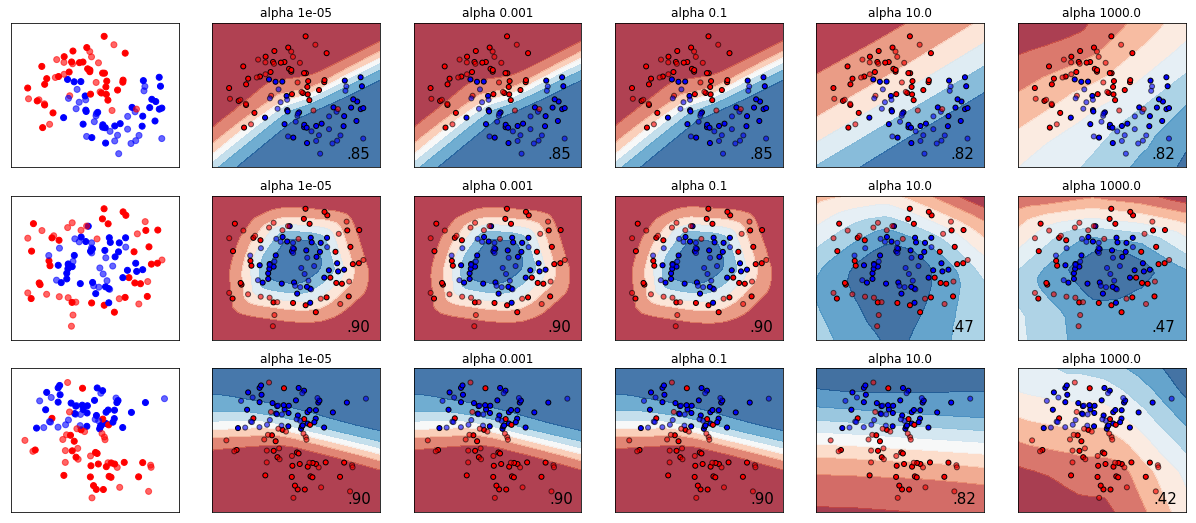

In [54]:
print(__doc__)


# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

h = .02  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
names = []
for i in alphas:
    names.append('alpha ' + str(i))

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(alpha=i, random_state=1))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()